# Classier Network Example: MINST Fashion
A simple example/test ClassifierNet object fund in NeuralNetworks, using classic example of the MNIST fashion data set: https://github.com/zalandoresearch/fashion-mnist

In [1]:
# Imports
import sys
sys.path.append('../')
from SimpleClassifier import SimpleClassifier
from BuildingBlocks import DenseBlock
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading the fashion data set
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Creating a key for the labels, to use in graphing etc.
label_key = {0:"T-Shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",
    7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [4]:
# Building the DNN using the ClassifierNet object.
# The arguments are: input dims (tuple), output dims (number of catagories), list of blocks:
block = DenseBlock([784, 196, 196, 49])
net = SimpleClassifier((28,28), 10, [block])

In [5]:
# Training the DNN
# Arguments are: training input (ndarray), training output (ndarray), batch size and epochs.
net.train(xtrain, ytrain, batch=5000, epochs=20)

Epoch 1/20
12/12 [==============================] - 3s 191ms/step - loss: 59.4625 - accuracy: 0.2112
Epoch 2/20
12/12 [==============================] - 2s 191ms/step - loss: 5.0036 - accuracy: 0.6200
Epoch 3/20
12/12 [==============================] - 2s 191ms/step - loss: 2.1319 - accuracy: 0.7021
Epoch 4/20
12/12 [==============================] - 2s 191ms/step - loss: 1.2841 - accuracy: 0.7249
Epoch 5/20
12/12 [==============================] - 2s 192ms/step - loss: 0.9608 - accuracy: 0.7274
Epoch 6/20
12/12 [==============================] - 2s 192ms/step - loss: 0.8929 - accuracy: 0.7564
Epoch 7/20
12/12 [==============================] - 2s 191ms/step - loss: 0.7439 - accuracy: 0.7822
Epoch 8/20
12/12 [==============================] - 3s 247ms/step - loss: 0.6654 - accuracy: 0.8008
Epoch 9/20
12/12 [==============================] - 2s 195ms/step - loss: 0.6538 - accuracy: 0.7985
Epoch 10/20
12/12 [==============================] - 2s 190ms/step - loss: 0.6337 - accuracy: 0.805

Text(0, 0.5, 'Accuracy')

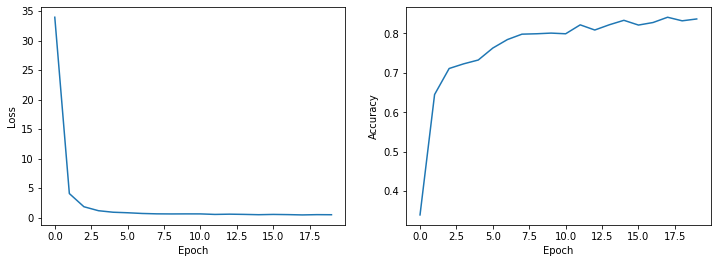

In [6]:
# Inspecting the Accuracy/Loss:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(net.loss); ax[0].set_xlabel("Epoch"); ax[0].set_ylabel("Loss")
ax[1].plot(net.accuracy); ax[1].set_xlabel("Epoch"); ax[1].set_ylabel("Accuracy")

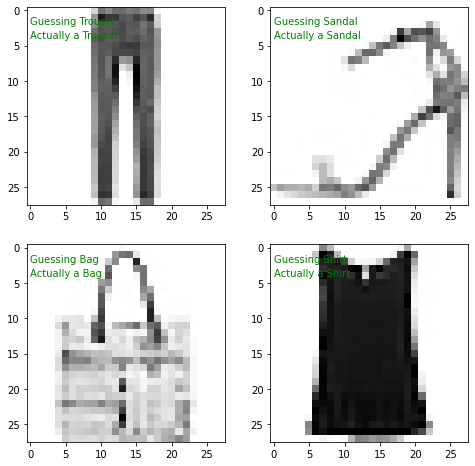

In [7]:
# Perhaps we wish to see what the DNN's guesses look like, so lets take a random
# sample of 4 of them, and display them along with what the guess is:
ims = np.random.randint(0, len(ytest), size=4)
guesses = net.predict(xtest[ims,:,:])
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axs = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]] # have to reindex them
for j in range(4):
    c = 'g' if guesses[j]==ytest[ims[j]] else 'r'
    axs[j].imshow(xtest[ims[j],:,:], cmap='Greys', interpolation='none')
    axs[j].text(0,2,"Guessing {}".format(label_key[guesses[j]]), color=c)
    axs[j].text(0,4,"Actually a {}".format(label_key[ytest[ims[j]]]), color=c)

Text(0.5, 0, 'Catagory')

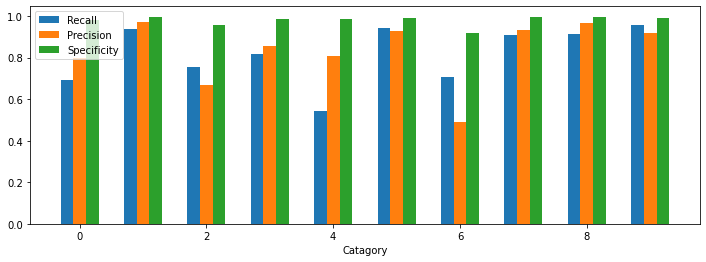

In [8]:
# Let's take a look at the error metrics for catagorization
acc, rec, prec, spec = net.score(xtest, ytest, averaged=False)
x = np.linspace(0,9,num=10)
fig = plt.figure(figsize=(12,4))
plt.bar(x-0.2, rec, width=0.2, label="Recall")
plt.bar(x, prec, width=0.2, label="Precision")
plt.bar(x+0.2, spec, width=0.2, label="Specificity")
plt.legend(); plt.xlabel("Catagory")

The specificity is fairly high across the board, meaning the model is fairly good at recognizing when an image *does not* belong in a particular catagory. The recall and precision (both measures of recognizing when an image *does* belong to particular catagory) are much more highly varied across the board. 

In particular, the model seems to have trouble with: t-shirts (0), pullovers (2), dresses (3), coats (4) and shirts (6). We might reasonably wonder if the DNN has trouble distinguishing these catagories due to their visual similarity. 

Text(0.5, 0, 'Predicted Catagory')

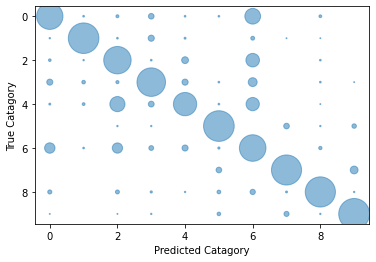

In [9]:
# Let's examine this in more detail using a bubble plot of the confusion matrix:
matrix = net.confusion(xtest, ytest)
x = np.linspace(0,9,num=10); y = np.linspace(0,9,num=10); x, y = np.meshgrid(x, y)
plt.scatter(x.reshape(100), y.reshape(100), s=matrix.reshape(100), alpha=0.5)
plt.ylabel("True Catagory"); plt.gca().invert_yaxis()
plt.xlabel("Predicted Catagory")

This does appear to be the case, seeing that t-shirts (0), pullovers (2), dresses (3) and coats (4) are all often mistaken by the network for a shirts (6) Similarly, coats (4) and shirts (6) are often mis-catagorized as a pullovers (2) (as well as shirts (6) for t-shirts (0)). Meanwhile, the network basically never mistakes a "sneaker" (7) for anything else, except occasionally an "ankle boot" (9) or "sandal" (5).

These results fluctuate a bit on retraining the network, but notably the catagories that get confused (0,2,3,4,6) and the catagories that are fairly well-recognized (1,5,7,8,9) remain the same on retraining.